In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import operator

from  scipy.stats import chi2_contingency
from util.api import calculate_bottom_dict, get_lts_list

%matplotlib inline
plt.style.use('classic')

In [2]:
lts_list = get_lts_list()
df_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/lts-{lts}/lts-{lts}.df')
    df_list.append(df)

# RQ0. Distribution
​
In this section, we respond the following two questions:
​
- How are packages distributed in stackage?
- How are packages using mtl distributed in Stackage?
​
For this, we make the following graphs
​
1. Line graph that shows the number of packets for each published snapshot over time
2. Bar graph that shows the evolution of the main categories of the packages
3. Bar graph that shows the evolution of the stabilities of the packages
4. Bar graph that shows the evolution of the main categories of the packages that depend of `mtl`
5. Bar graph that shows the evolution of the stabilities of the packages that depend of `mtl`
​
## RQ0. 5 - Bar graph that shows the evolution of the stabilities of the packages that depend of `mtl`

In [3]:
stabilities = ['', 'experimental', 'stable', 'provisional', 'alpha', 'beta']
data = {
    '': [],
    'experimental': [],
    'stable': [],
    'provisional': [],
    'alpha': [],
    'beta': []
}
count_pkgs = {
    '': [],
    'experimental': [],
    'stable': [],
    'provisional': [],
    'alpha': [],
    'beta': []
}
stability_df = []

df_stability_list = []
for idx, df in enumerate(df_list):
    list_pkg = []
    list_stab = []
    list_mtl = []
    for idx,row in df.iterrows():
        pkg = row['package']
        stabs = row['stability']
        mtl = row['mtl-direct']
        for stab in stabs:
            list_pkg.append(pkg)
            list_stab.append(stab)
            list_mtl.append(mtl)
    dict_stab = {'package':list_pkg,'stability':list_stab,'mtl-direct':list_mtl}
    df_stab = pd.DataFrame(dict_stab)
    df_stability_list.append(df_stab)
    
for idx, df in enumerate(df_stability_list):
    aux_df = df[['package', 'stability', 'mtl-direct']]
    aux_df = aux_df[aux_df['mtl-direct'] == 1].groupby(['stability']).count().reset_index().rename(columns={"package": "count"})
    aux_df.loc[:, 'version'] = lts_list[idx]
    stability_df.append(aux_df.sort_values(by=['count'], ascending=False))

for stability in stabilities:
    for idx, lts in enumerate(df_list):
        total_pkgs = len(df_list[idx])
        
        aux = int(stability_df[idx][stability_df[idx]['stability'] == stability]['count']) * 100 / total_pkgs
        count = int(stability_df[idx][stability_df[idx]['stability'] == stability]['count'])
        count_pkgs[stability].append(count)
        data[stability].append(aux)
        
stabilities[0]='n/a'
for i in range (len(data['alpha'])):
    data['alpha'][i] = data['alpha'][i]+data['beta'][i]

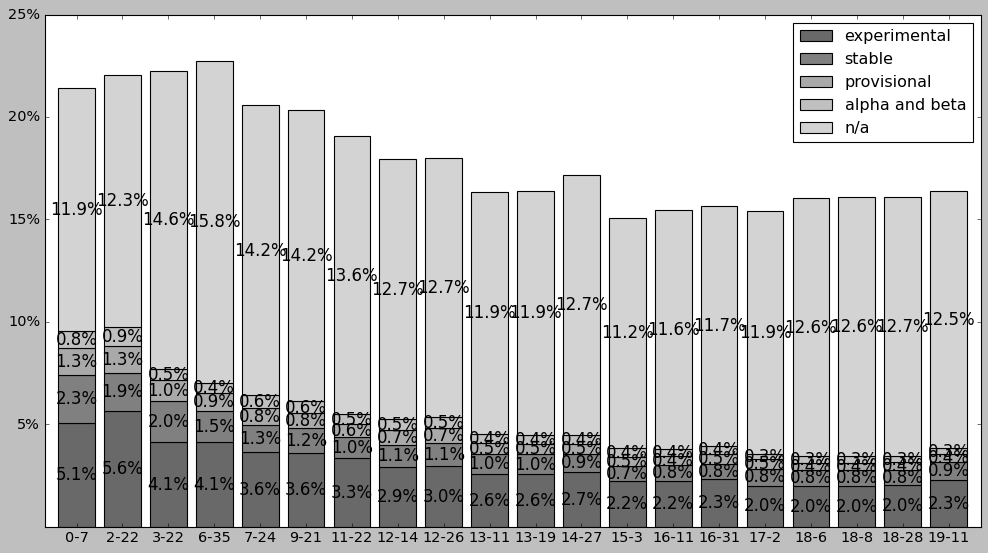

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

stabilities = ['experimental', 'stable', 'provisional', 'alpha and beta','n/a']
stabilities_name = ['experimental', 'stable', 'provisional', 'alpha','']
nom_stabilities = []
colors = ['dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey','whitesmoke']
for idx, cat in enumerate(stabilities_name):
    nom_stabilities.append(cat)
    bar = ax.bar(x=lts_list, height=data[cat], bottom=calculate_bottom_dict(data, nom_stabilities, idx), width=.8, color=colors[idx], align='center', label=stabilities[idx])
    ax.bar_label(bar, labels=list(map(lambda per: f"{round(per,1)}%",data[cat])), label_type='center', color='black',fontsize=15)

ax.legend(loc='upper right', fontsize='large')
ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=13)
ax.set_yticks([5,10, 15, 20, 25])
ax.set_yticklabels(['5%','10%', '15%','20%', '25%'],fontsize=13)
plt.savefig("../../graphs/rq0-5.pdf", format='pdf', bbox_inches='tight')
plt.show()